In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import datetime

# Подготовка датасета по солнечной активности

### Считываем и объединяем датасеты за 11 месяцев 2011 года

In [2]:
files = ['ratyng_1.csv', 'ratyng_2.csv', 'ratyng_3.csv', 'ratyng_4.csv', 'ratyng_5.csv', 'ratyng_6.csv', 'ratyng_7.csv', 'ratyng_8.csv', 'ratyng_9.csv', 'ratyng_10.csv', 'ratyng_11.csv']
dfs = [pd.read_csv(file) for file in files]

final_df = pd.concat(dfs)
final_df

,date,power
0,"Просмотр архива за суббота, 1 января 2011",C1.2
1,"Просмотр архива за воскресенье, 2 января 2011",B6.67
2,"Просмотр архива за понедельник, 3 января 2011",C1.63
3,"Просмотр архива за вторник, 4 января 2011",C2.84
4,"Просмотр архива за среда, 5 января 2011",B5.82
...,...,...
25,"Просмотр архива за суббота, 26 ноября 2011",C2.19
26,"Просмотр архива за воскресенье, 27 ноября 2011",C1.99
27,"Просмотр архива за понедельник, 28 ноября 2011",C4.64
28,"Просмотр архива за вторник, 29 ноября 2011",C3.59


In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    332 non-null    object
 1   power   332 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB


### Добавляем id

In [4]:
from uuid import uuid4
final_df['uuid'] = final_df.index.to_series().map(lambda x: uuid4())
final_df.head()

,date,power,uuid
0,"Просмотр архива за суббота, 1 января 2011",C1.2,2f61c9a5-6170-43e2-a335-1174bcc7cc9c
1,"Просмотр архива за воскресенье, 2 января 2011",B6.67,443676db-a010-4fec-a920-ffeff08172c8
2,"Просмотр архива за понедельник, 3 января 2011",C1.63,331034f6-3e18-4228-bf3e-00c42be38eb1
3,"Просмотр архива за вторник, 4 января 2011",C2.84,972be221-d77c-4e68-afc7-c66d21154918
4,"Просмотр архива за среда, 5 января 2011",B5.82,a8644ba8-76db-4a68-8805-f4add0b823c8


In [5]:
new_df = final_df['date'].str.split(expand=True)
new_df.head()

,0,1,2,3,4,5,6
0,Просмотр,архива,за,"суббота,",1,января,2011
1,Просмотр,архива,за,"воскресенье,",2,января,2011
2,Просмотр,архива,за,"понедельник,",3,января,2011
3,Просмотр,архива,за,"вторник,",4,января,2011
4,Просмотр,архива,за,"среда,",5,января,2011


In [6]:
new_df.columns=['1', '2', '3', '4', 'dey', 'month', 'year']
new_df.head()

,1,2,3,4,dey,month,year
0,Просмотр,архива,за,"суббота,",1,января,2011
1,Просмотр,архива,за,"воскресенье,",2,января,2011
2,Просмотр,архива,за,"понедельник,",3,января,2011
3,Просмотр,архива,за,"вторник,",4,января,2011
4,Просмотр,архива,за,"среда,",5,января,2011


In [7]:
final_df1 = pd.concat([final_df,new_df],axis=1)
final_df1.head()

,date,power,uuid,1,2,3,4,dey,month,year
0,"Просмотр архива за суббота, 1 января 2011",C1.2,2f61c9a5-6170-43e2-a335-1174bcc7cc9c,Просмотр,архива,за,"суббота,",1,января,2011
1,"Просмотр архива за воскресенье, 2 января 2011",B6.67,443676db-a010-4fec-a920-ffeff08172c8,Просмотр,архива,за,"воскресенье,",2,января,2011
2,"Просмотр архива за понедельник, 3 января 2011",C1.63,331034f6-3e18-4228-bf3e-00c42be38eb1,Просмотр,архива,за,"понедельник,",3,января,2011
3,"Просмотр архива за вторник, 4 января 2011",C2.84,972be221-d77c-4e68-afc7-c66d21154918,Просмотр,архива,за,"вторник,",4,января,2011
4,"Просмотр архива за среда, 5 января 2011",B5.82,a8644ba8-76db-4a68-8805-f4add0b823c8,Просмотр,архива,за,"среда,",5,января,2011


### Удаление лишних столбцов

In [8]:
final_df1.drop(final_df1.columns[[0, 2, 3, 4, 5, 6]], axis=1, inplace=True)
final_df1.head()

,power,dey,month,year
0,C1.2,1,января,2011
1,B6.67,2,января,2011
2,C1.63,3,января,2011
3,C2.84,4,января,2011
4,B5.82,5,января,2011


### Меняем название месяца на цифровое представление

In [9]:
d = {'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4, 'мая': 5, 'июня': 6, 'июля': 7, 'августа': 8, 'сентября': 9, 'октября': 10, 'ноября': 11,}

In [10]:
final_df1.month = final_df1.month.map(d)
final_df1.head()

,power,dey,month,year
0,C1.2,1,1,2011
1,B6.67,2,1,2011
2,C1.63,3,1,2011
3,C2.84,4,1,2011
4,B5.82,5,1,2011


In [11]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   power   332 non-null    object
 1   dey     332 non-null    object
 2   month   332 non-null    int64 
 3   year    332 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [12]:
final_df1[['dey', 'month', 'year']] = final_df1[['dey', 'month', 'year']].astype (int)
final_df1.head()

,power,dey,month,year
0,C1.2,1,1,2011
1,B6.67,2,1,2011
2,C1.63,3,1,2011
3,C2.84,4,1,2011
4,B5.82,5,1,2011


### Подготовка данных для пребразование в формат datetime

In [13]:
import io

In [14]:
final_df1["month"] = final_df1.month.map("{:02}".format)

In [15]:
final_df1["dey"] = final_df1.dey.map("{:02}".format)

In [16]:
final_df1.head()

,power,dey,month,year
0,C1.2,01,01,2011
1,B6.67,02,01,2011
2,C1.63,03,01,2011
3,C2.84,04,01,2011
4,B5.82,05,01,2011


In [17]:
final_df1[['dey', 'month', 'year']] = final_df1[['dey', 'month', 'year']].astype (str)
final_df1.head()

,power,dey,month,year
0,C1.2,01,01,2011
1,B6.67,02,01,2011
2,C1.63,03,01,2011
3,C2.84,04,01,2011
4,B5.82,05,01,2011


In [18]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   power   332 non-null    object
 1   dey     332 non-null    object
 2   month   332 non-null    object
 3   year    332 non-null    object
dtypes: object(4)
memory usage: 21.1+ KB


In [19]:
final_df1['date'] = final_df1['year'].map(str) + final_df1['month'].map(str) +  final_df1['dey'].map(str)
final_df1.head()

,power,dey,month,year,date
0,C1.2,01,01,2011,20110101
1,B6.67,02,01,2011,20110102
2,C1.63,03,01,2011,20110103
3,C2.84,04,01,2011,20110104
4,B5.82,05,01,2011,20110105


 ### Конвертация в формат Datetime

In [20]:
final_df1['date'] = pd.to_datetime(final_df1['date'], format='%Y%m%d')
final_df1.head()

,power,dey,month,year,date
0,C1.2,01,01,2011,2011-01-01
1,B6.67,02,01,2011,2011-01-02
2,C1.63,03,01,2011,2011-01-03
3,C2.84,04,01,2011,2011-01-04
4,B5.82,05,01,2011,2011-01-05


# Подготовка датасета по дорожно-транспортные происшествия в Барселоне

In [21]:
df = pd.read_csv('accidents_opendata.csv')
df.head()

<ipython-input-21-5383fbd3cf80>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accidents_opendata.csv')


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,...,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,-1,-1,NaN,NaN
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,...,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",NaN,NaN
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",NaN,NaN
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",NaN,NaN
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,...,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110655 entries, 0 to 110654
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   case_id            110655 non-null  object 
 1   district_id        110654 non-null  float64
 2   district_name      110654 non-null  object 
 3   neighborhood_id    110654 non-null  object 
 4   neighborhood_name  110654 non-null  object 
 5   street_code        110654 non-null  float64
 6   street_name        110653 non-null  object 
 7   postal_code        105851 non-null  object 
 8   weekday_name       110655 non-null  object 
 9   weekday            102995 non-null  object 
 10  type_day           102995 non-null  object 
 11  year               110654 non-null  float64
 12  month              110654 non-null  float64
 13  month_name         110654 non-null  object 
 14  day                110654 non-null  float64
 15  hour               110654 non-null  float64
 16  cy

### Удаление лишних строк. Оставляем данные за 2011 год.

In [23]:
df1 = df[df['year'] > 2010]

In [24]:
df2 = df1[df1['year'] < 2012]

### Удаление лишних столбцов

In [25]:
df2.drop(df2.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1, inplace=True)

<ipython-input-25-18d67d011107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1, inplace=True)


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 42672 to 51502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    8831 non-null   float64
 1   month   8831 non-null   float64
 2   day     8831 non-null   float64
dtypes: float64(3)
memory usage: 276.0 KB


In [27]:
df2.head()

,year,month,day
42672,2011.0,1.0,13.0
42673,2011.0,2.0,2.0
42674,2011.0,10.0,21.0
42675,2011.0,11.0,14.0
42676,2011.0,1.0,18.0


In [28]:
df2[['year', 'month', 'day']] = df2[['year', 'month', 'day']].astype (int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 42672 to 51502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8831 non-null   int64
 1   month   8831 non-null   int64
 2   day     8831 non-null   int64
dtypes: int64(3)
memory usage: 276.0 KB


<ipython-input-28-441fa5150a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['year', 'month', 'day']] = df2[['year', 'month', 'day']].astype (int)


### Подготовка данных для пребразование в формат datetime

Добавление нуля перед днём и месяцем прописаных 1 цифрой

In [29]:
df2["month"] = df2.month.map("{:02}".format)

<ipython-input-29-3031a264d1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["month"] = df2.month.map("{:02}".format)


In [30]:
df2["day"] = df2.day.map("{:02}".format)

<ipython-input-30-30a922f40caf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["day"] = df2.day.map("{:02}".format)


In [31]:
df2.head()

,year,month,day
42672,2011,01,13
42673,2011,02,02
42674,2011,10,21
42675,2011,11,14
42676,2011,01,18


In [32]:
df2['date'] = df2['year'].map(str) + df2['month'].map(str) +  df2['day'].map(str)
df2.head()

<ipython-input-32-81be3d3e7f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = df2['year'].map(str) + df2['month'].map(str) +  df2['day'].map(str)


,year,month,day,date
42672,2011,01,13,20110113
42673,2011,02,02,20110202
42674,2011,10,21,20111021
42675,2011,11,14,20111114
42676,2011,01,18,20110118


### Конвертация в формат Datetime

In [33]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')
df2.head()

<ipython-input-33-9dbb5a4b2f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')


,year,month,day,date
42672,2011,01,13,2011-01-13
42673,2011,02,02,2011-02-02
42674,2011,10,21,2011-10-21
42675,2011,11,14,2011-11-14
42676,2011,01,18,2011-01-18


### Создаем столбец с количеством эпизодов

In [34]:
df2['count']= 1
df2.head()

<ipython-input-34-0123bb2b0d1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['count']= 1


,year,month,day,date,count
42672,2011,01,13,2011-01-13,1
42673,2011,02,02,2011-02-02,1
42674,2011,10,21,2011-10-21,1
42675,2011,11,14,2011-11-14,1
42676,2011,01,18,2011-01-18,1


### вычислить совокупную сумму по датам

In [35]:
df2['count_sum'] = df2.groupby(['date'])['count']. cumsum ()

<ipython-input-35-9664b3f59dc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['count_sum'] = df2.groupby(['date'])['count']. cumsum ()


In [36]:
mask_ = df2['count_sum'] == df2.groupby('date')['count_sum'].transform('max')
sum_df2 = df2[mask_]
sum_df2.head()

,year,month,day,date,count,count_sum
49273,2011,10,30,2011-10-30,1,9
49287,2011,01,09,2011-01-09,1,11
49640,2011,08,21,2011-08-21,1,8
49771,2011,02,27,2011-02-27,1,12
49806,2011,08,19,2011-08-19,1,12


### Удаляем лишние столбцы

In [37]:
sum_df2.drop(sum_df2.columns[[0, 1, 2, 4]], axis=1, inplace=True)
sum_df2.head()

<ipython-input-37-f6635c3ae490>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df2.drop(sum_df2.columns[[0, 1, 2, 4]], axis=1, inplace=True)


,date,count_sum
49273,2011-10-30,9
49287,2011-01-09,11
49640,2011-08-21,8
49771,2011-02-27,12
49806,2011-08-19,12


In [38]:
sum_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 49273 to 51502
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       365 non-null    datetime64[ns]
 1   count_sum  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


# Объединяем датасеты

In [39]:
merged_df = pd.merge_ordered(sum_df2, final_df1)
merged_df

,date,count_sum,power,dey,month,year
0,2011-01-01,9,C1.2,01,01,2011
1,2011-01-02,13,B6.67,02,01,2011
2,2011-01-03,23,C1.63,03,01,2011
3,2011-01-04,17,C2.84,04,01,2011
4,2011-01-05,21,B5.82,05,01,2011
...,...,...,...,...,...,...
360,2011-12-27,23,NaN,NaN,NaN,NaN
361,2011-12-28,25,NaN,NaN,NaN,NaN
362,2011-12-29,21,NaN,NaN,NaN,NaN
363,2011-12-30,27,NaN,NaN,NaN,NaN


### Удаляем строки со значением NaN, оставляя тем самым данные за 11 месяцев 2011 года

In [40]:
merged_df = merged_df.dropna()
merged_df

,date,count_sum,power,dey,month,year
0,2011-01-01,9,C1.2,01,01,2011
1,2011-01-02,13,B6.67,02,01,2011
2,2011-01-03,23,C1.63,03,01,2011
3,2011-01-04,17,C2.84,04,01,2011
4,2011-01-05,21,B5.82,05,01,2011
...,...,...,...,...,...,...
329,2011-11-26,30,C2.19,26,11,2011
330,2011-11-27,13,C1.99,27,11,2011
331,2011-11-28,29,C4.64,28,11,2011
332,2011-11-29,27,C3.59,29,11,2011


### Приведение данных по мощности вспышек в формат float

In [41]:
def power_res(power):

  if power[0] == "X":
    return float(power[1::]) * 10
  elif power[0] == "M":
    return float(power[1::])
  elif power[0] == "C":
    return float(power[1::]) / 10
  elif power[0] == "B":
    return float(power[1::]) / 100

merged_df["power_res"] = merged_df["power"].apply(power_res)
merged_df.head()

<ipython-input-41-601ca49133b3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["power_res"] = merged_df["power"].apply(power_res)


,date,count_sum,power,dey,month,year,power_res
0,2011-01-01,9,C1.2,01,01,2011,0.1200
1,2011-01-02,13,B6.67,02,01,2011,0.0667
2,2011-01-03,23,C1.63,03,01,2011,0.1630
3,2011-01-04,17,C2.84,04,01,2011,0.2840
4,2011-01-05,21,B5.82,05,01,2011,0.0582


### Сохранение объединённого датасета в формае csv

In [46]:
merged_df.to_csv('merged_df.csv')

### Отрисовка полученых данных на графике

<Axes: title={'center': 'V comp'}, xlabel='date', ylabel='V'>

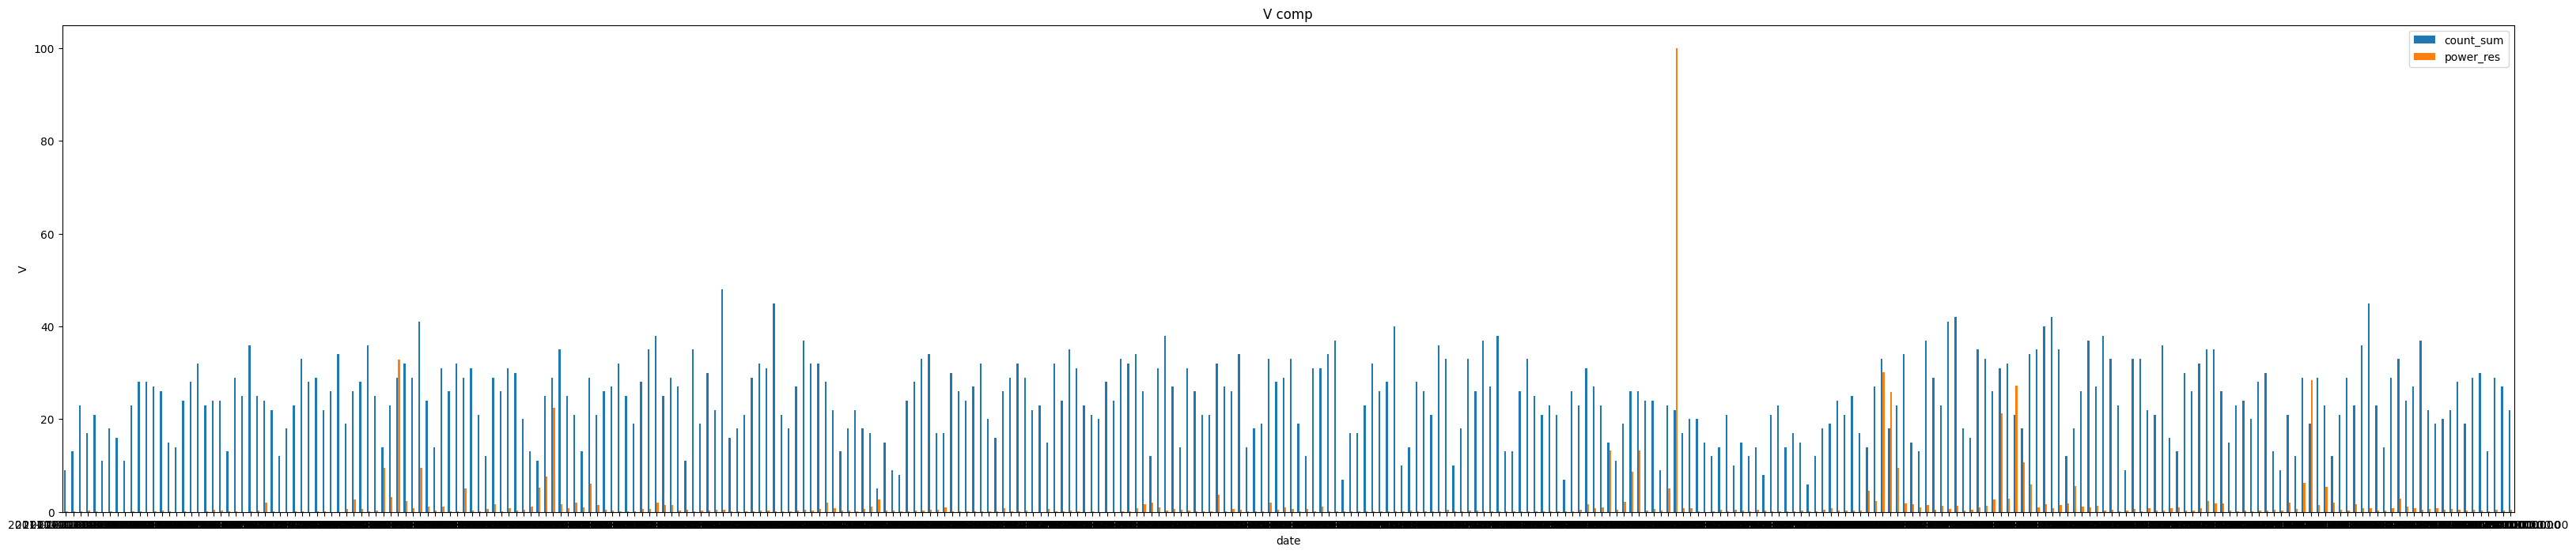

In [42]:
merged_df.plot(x='date', y=['count_sum', 'power_res'], kind='bar', title="V comp", figsize=(40,8), ylabel='V', rot=0)

In [43]:
merged_df['count_sum'].describe().round(2)

,count_sum
count,332.00
mean,24.19
std,8.16
min,5.00
25%,18.00
50%,24.00
75%,30.00
max,48.00


In [44]:
merged_df['power_res'].describe().round(2)

,power_res
count,332.00
mean,1.76
std,6.84
min,0.01
25%,0.11
50%,0.34
75%,0.88
max,100.00


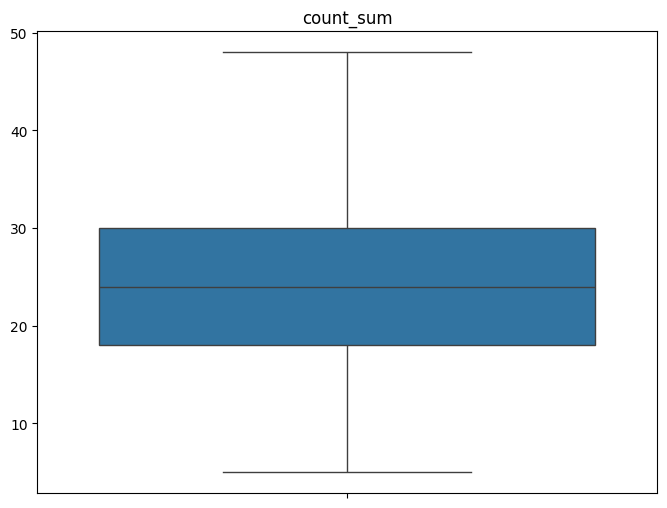

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, y='count_sum')
plt.title('count_sum')
plt.ylabel('')
plt.show()

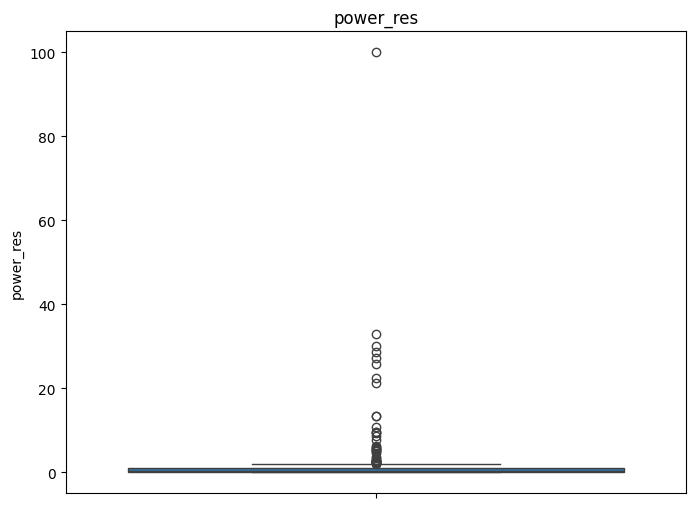

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, y='power_res')
plt.title('power_res')
# plt.ylabel('')
plt.show()

### Обнаружение и обработка выбросов

In [47]:
z_scores = np.abs(stats.zscore(merged_df.select_dtypes(include=np.number)))
merged_df = merged_df[(z_scores < 3).all(axis=1)]

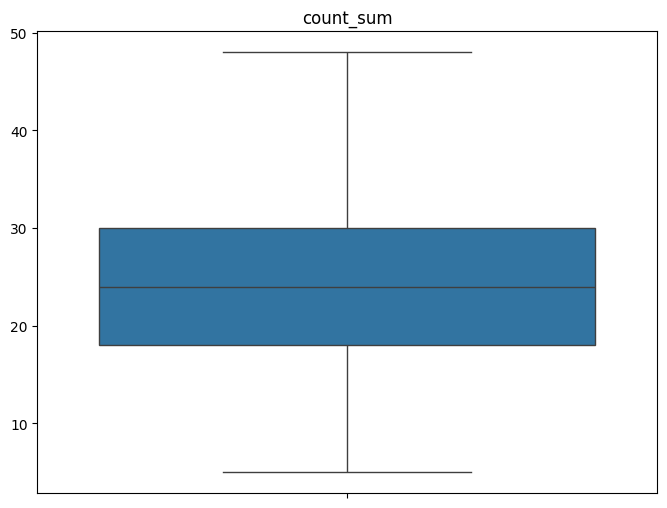

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, y='count_sum')
plt.title('count_sum')
plt.ylabel('')
plt.show()

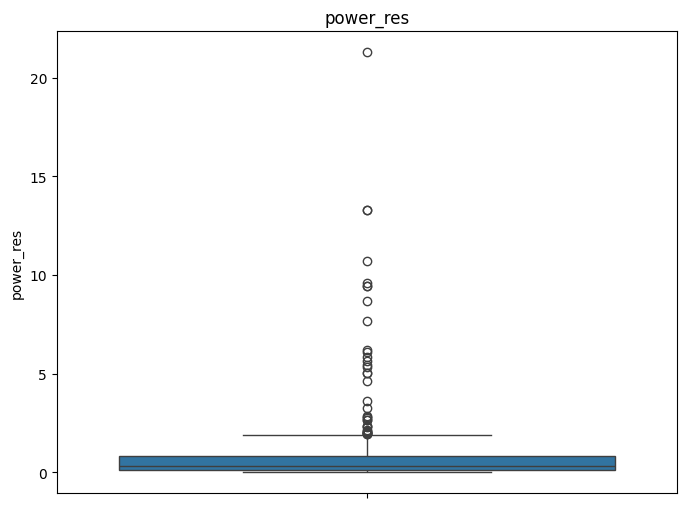

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, y='power_res')
plt.title('power_res')
# plt.ylabel('')
plt.show()

<Axes: title={'center': 'V comp'}, xlabel='date', ylabel='V'>

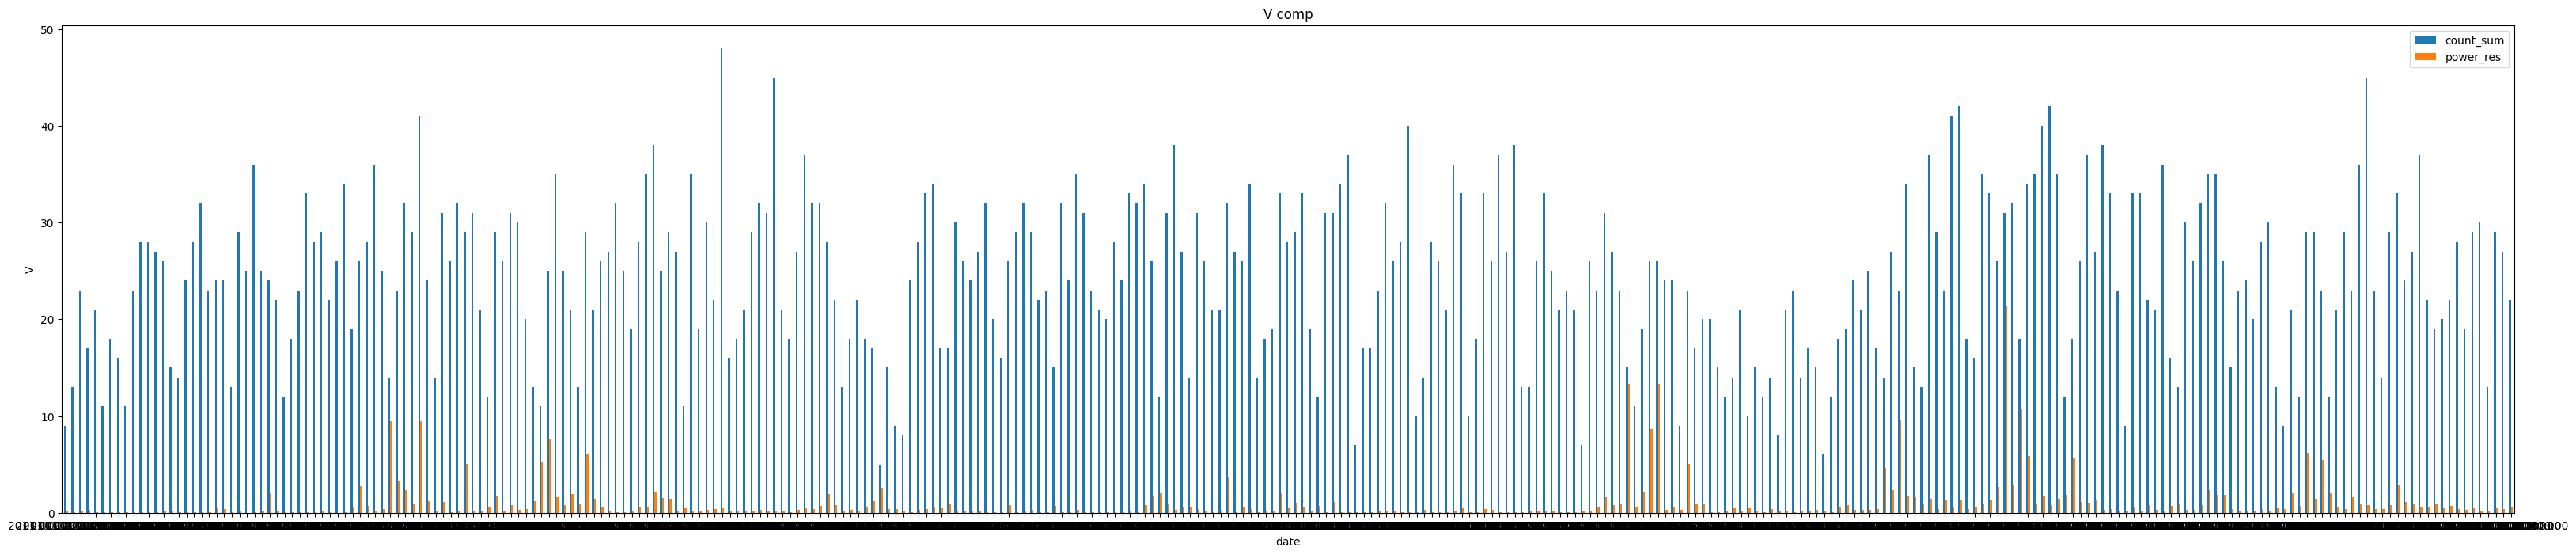

In [50]:
merged_df.plot(x='date', y=['count_sum', 'power_res'], kind='bar', title="V comp", figsize=(40,8), ylabel='V', rot=0)